In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Inspecting data for anomolies based on year i.e. missing data in early years

Steps:

1. add year column
2. plot 

In [8]:
data_dir = 'data/'
df = pd.read_csv(data_dir+'clean_data.csv', index_col=0)
df.head()          

,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,PTS,REB,REB%,STL,TO RATIO,TOT MIN,TOV,TS%,USG%,MPG
A.C. Green 96,2.6,0.4,6.8,8.4,15.5,29.9,11.8,95.9,4.1,13.3,...,12.7,14.0,13.5,1.5,10.3,2494.0,1.6,52.3,11.8,30.048193
Aaron McKie 96,16.6,19.6,25.2,12.4,22.6,17.7,14.4,71.8,28.2,13.2,...,14.0,7.2,7.1,2.5,13.5,1624.0,2.9,52.4,14.2,19.566265
Adam Keefe 96,0.5,0.0,6.7,16.9,16.5,24.4,11.3,99.4,0.6,11.6,...,13.3,12.2,12.9,1.7,15.9,917.0,2.5,57.2,12.4,14.790323
Allan Houston 96,44.7,45.0,14.6,6.7,19.6,11.6,24.5,62.8,37.2,22.3,...,23.2,4.6,4.8,0.8,11.4,2681.0,3.2,53.1,21.8,33.098765
Allen Iverson 96,42.8,45.7,42.2,7.6,26.5,11.0,27.9,69.7,30.3,26.1,...,28.5,5.0,4.9,2.5,12.7,3041.0,5.4,51.3,28.1,40.013158


In [21]:
## Add year column for easy groupby
df['YEAR'] = df.index.str.slice(start=-2)
df.head()

,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,REB,REB%,STL,TO RATIO,TOT MIN,TOV,TS%,USG%,MPG,YEAR
A.C. Green 96,2.6,0.4,6.8,8.4,15.5,29.9,11.8,95.9,4.1,13.3,...,14.0,13.5,1.5,10.3,2494.0,1.6,52.3,11.8,30.048193,96
Aaron McKie 96,16.6,19.6,25.2,12.4,22.6,17.7,14.4,71.8,28.2,13.2,...,7.2,7.1,2.5,13.5,1624.0,2.9,52.4,14.2,19.566265,96
Adam Keefe 96,0.5,0.0,6.7,16.9,16.5,24.4,11.3,99.4,0.6,11.6,...,12.2,12.9,1.7,15.9,917.0,2.5,57.2,12.4,14.790323,96
Allan Houston 96,44.7,45.0,14.6,6.7,19.6,11.6,24.5,62.8,37.2,22.3,...,4.6,4.8,0.8,11.4,2681.0,3.2,53.1,21.8,33.098765,96
Allen Iverson 96,42.8,45.7,42.2,7.6,26.5,11.0,27.9,69.7,30.3,26.1,...,5.0,4.9,2.5,12.7,3041.0,5.4,51.3,28.1,40.013158,96


In [36]:
## want to add the full year 
df['YEAR'] = df['YEAR'].apply(lambda x: int('20'+x) if int(x) < 20 else int('19'+x))

In [37]:
df['YEAR']

A.C. Green 96             1996
Aaron McKie 96            1996
Adam Keefe 96             1996
Allan Houston 96          1996
Allen Iverson 96          1996
                          ... 
Will Barton 19            2019
Willie Cauley-Stein 19    2019
Wilson Chandler 19        2019
Zach LaVine 19            2019
Zion Williamson 19        2019
Name: YEAR, Length: 7246, dtype: int64

In [47]:
## redo groupby
year_grpby = df.groupby(['YEAR'])

In [49]:
year_grpby.groups[1996]

Index(['A.C. Green 96', 'Aaron McKie 96', 'Adam Keefe 96', 'Allan Houston 96',
       'Allen Iverson 96', 'Alonzo Mourning 96', 'Andrew DeClercq 96',
       'Andrew Lang 96', 'Anfernee Hardaway 96', 'Anthony Goldwire 96',
       ...
       'Vincent Askew 96', 'Vinny Del Negro 96', 'Vitaly Potapenko 96',
       'Vlade Divac 96', 'Voshon Lenard 96', 'Walt Williams 96',
       'Wayman Tisdale 96', 'Wesley Person 96', 'Will Perdue 96',
       'Xavier McDaniel 96'],
      dtype='object', length=287)

In [51]:
year_grpby.get_group(1996)

,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,REB,REB%,STL,TO RATIO,TOT MIN,TOV,TS%,USG%,MPG,YEAR
A.C. Green 96,2.6,0.4,6.8,8.4,15.5,29.9,11.8,95.9,4.1,13.3,...,14.0,13.5,1.5,10.3,2494.0,1.6,52.3,11.8,30.048193,1996
Aaron McKie 96,16.6,19.6,25.2,12.4,22.6,17.7,14.4,71.8,28.2,13.2,...,7.2,7.1,2.5,13.5,1624.0,2.9,52.4,14.2,19.566265,1996
Adam Keefe 96,0.5,0.0,6.7,16.9,16.5,24.4,11.3,99.4,0.6,11.6,...,12.2,12.9,1.7,15.9,917.0,2.5,57.2,12.4,14.790323,1996
Allan Houston 96,44.7,45.0,14.6,6.7,19.6,11.6,24.5,62.8,37.2,22.3,...,4.6,4.8,0.8,11.4,2681.0,3.2,53.1,21.8,33.098765,1996
Allen Iverson 96,42.8,45.7,42.2,7.6,26.5,11.0,27.9,69.7,30.3,26.1,...,5.0,4.9,2.5,12.7,3041.0,5.4,51.3,28.1,40.013158,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Walt Williams 96,38.1,40.5,16.7,18.8,18.0,17.6,22.3,55.5,44.5,21.4,...,7.2,7.3,1.9,11.9,2649.0,3.4,55.1,21.2,36.287671,1996
Wayman Tisdale 96,0.0,0.0,4.7,32.8,26.3,18.8,28.1,100.0,0.0,26.1,...,7.9,7.8,0.5,8.0,779.0,2.4,44.1,24.9,14.698113,1996
Wesley Person 96,46.7,53.3,10.2,11.0,16.7,16.2,22.2,54.2,45.8,21.8,...,6.2,6.4,1.8,6.6,2331.0,1.6,56.7,19.2,29.137500,1996
Will Perdue 96,0.0,0.0,4.6,45.5,14.3,36.8,13.2,100.0,0.0,16.7,...,17.9,17.7,0.9,14.3,1919.0,2.4,58.2,13.6,29.523077,1996


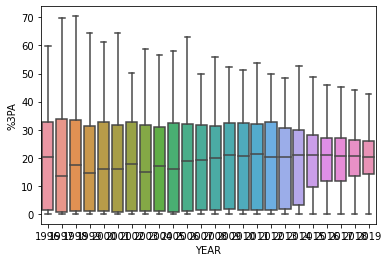

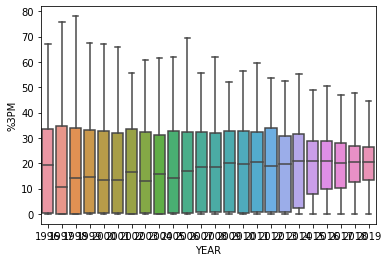

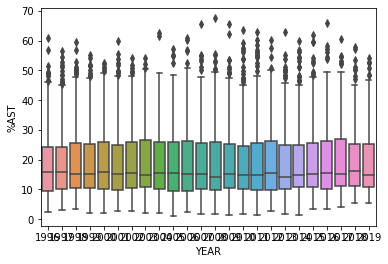

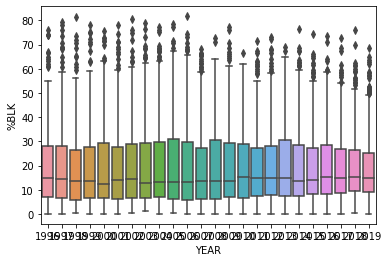

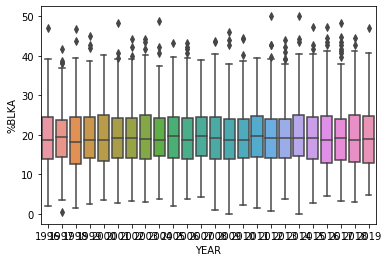

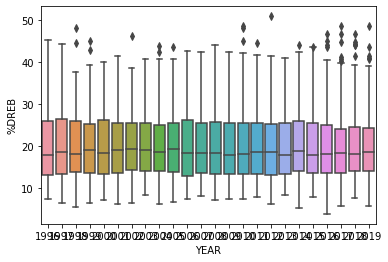

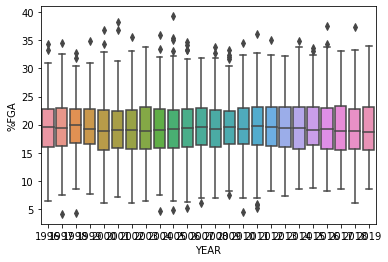

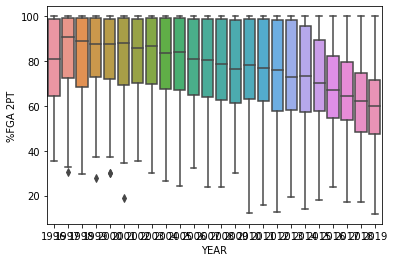

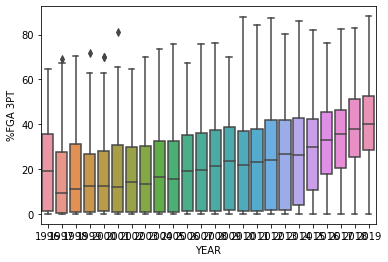

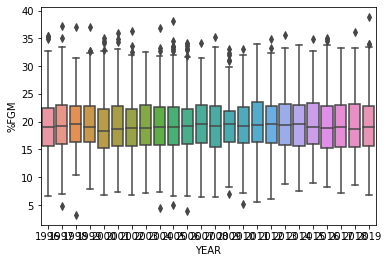

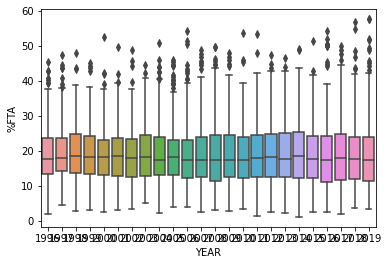

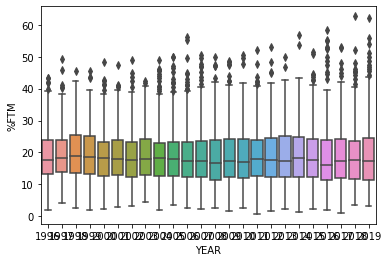

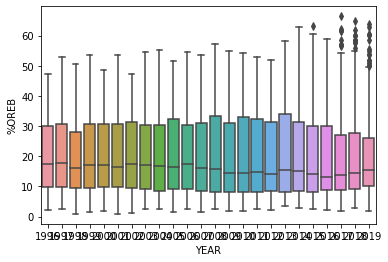

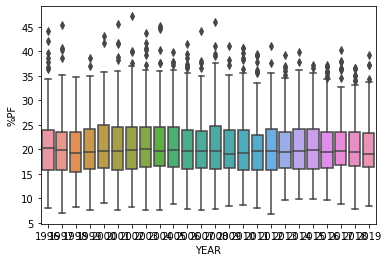

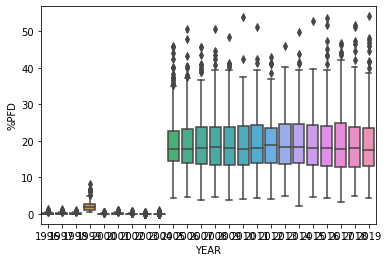

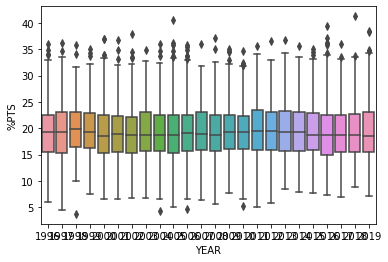

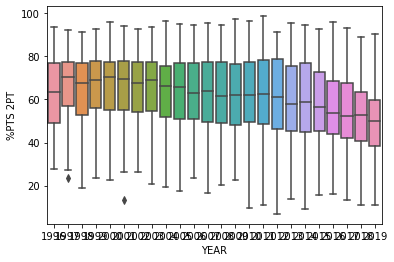

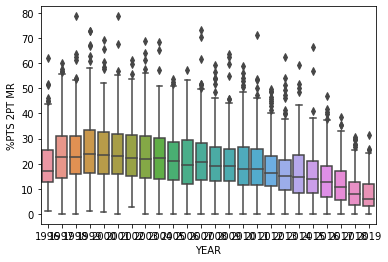

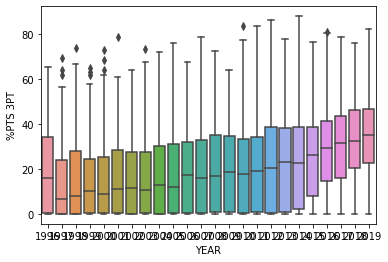

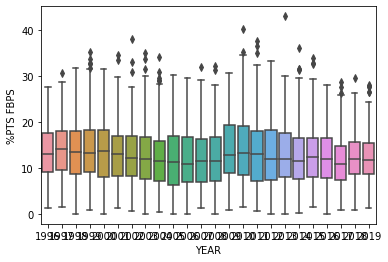

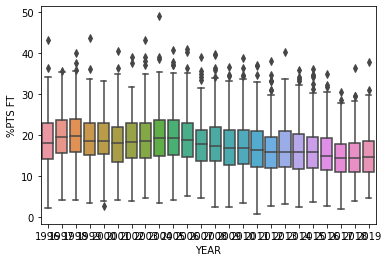

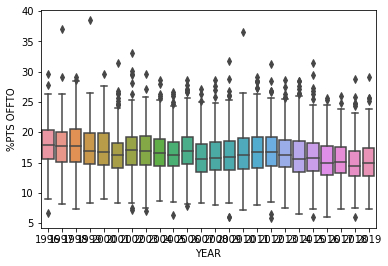

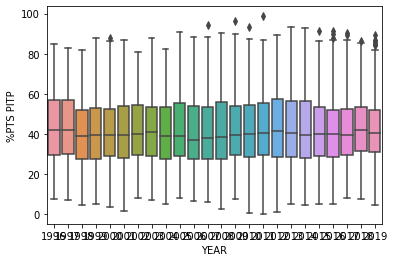

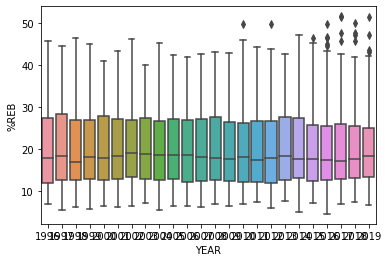

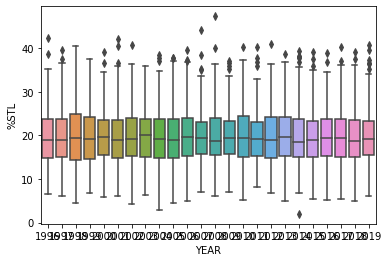

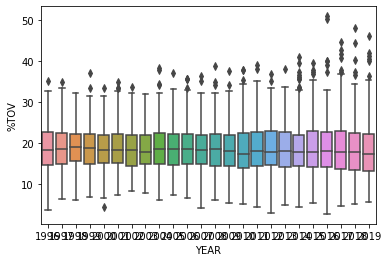

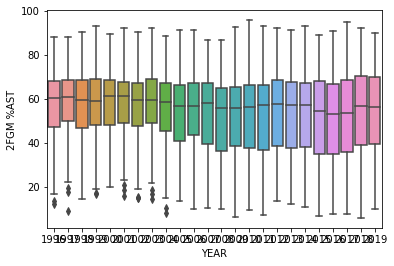

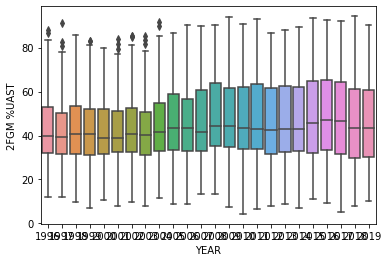

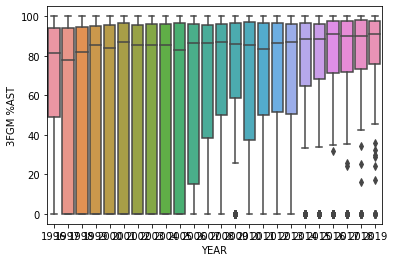

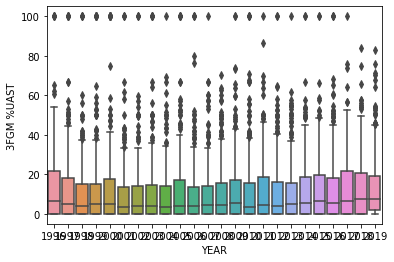

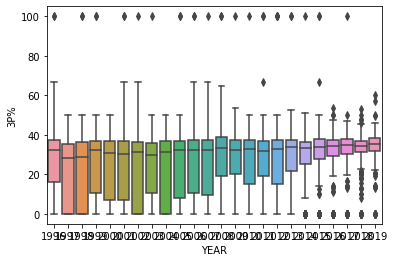

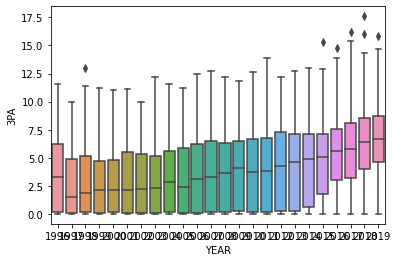

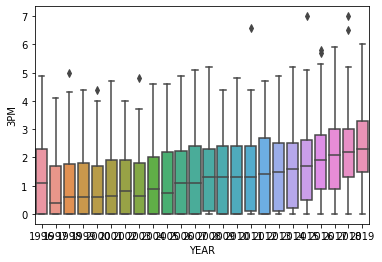

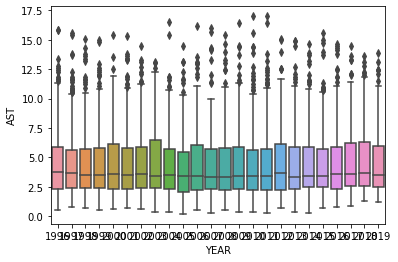

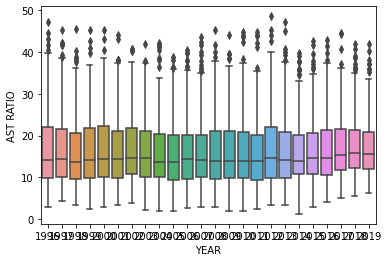

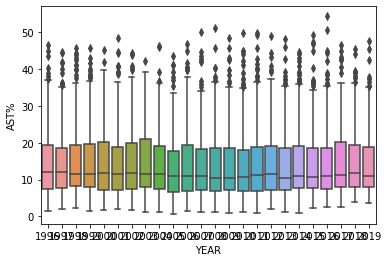

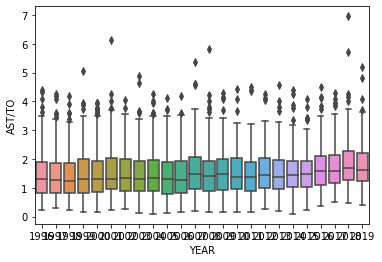

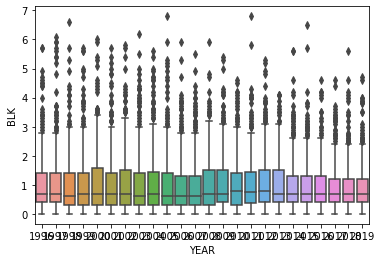

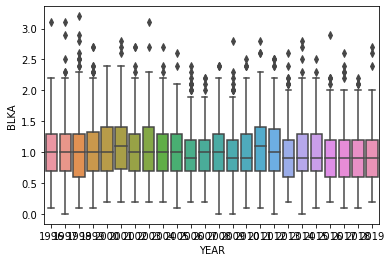

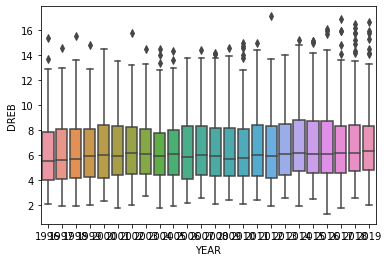

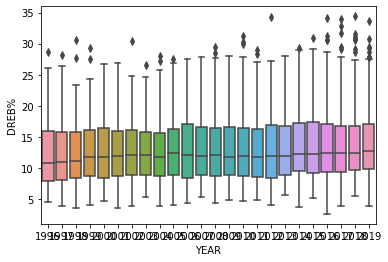

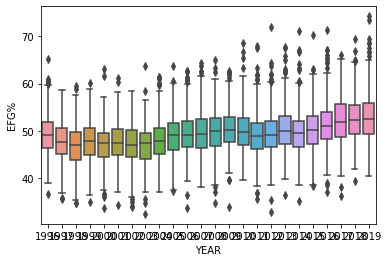

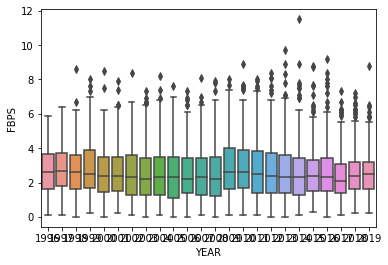

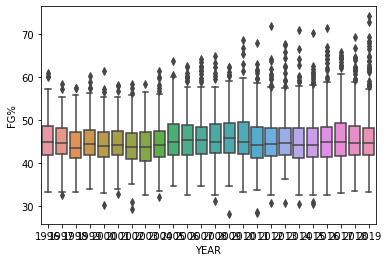

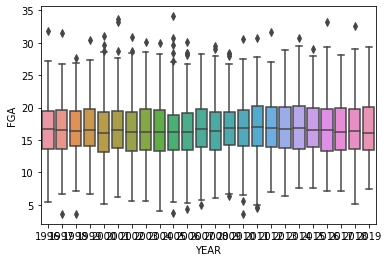

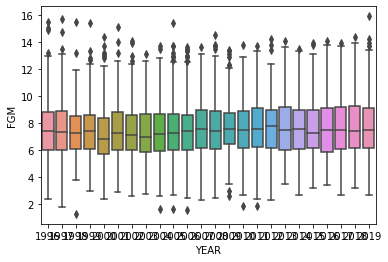

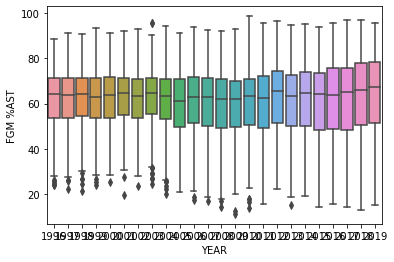

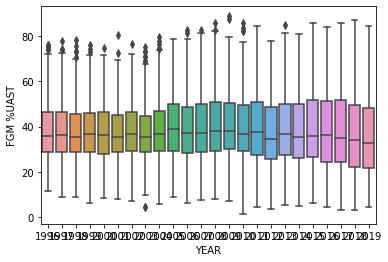

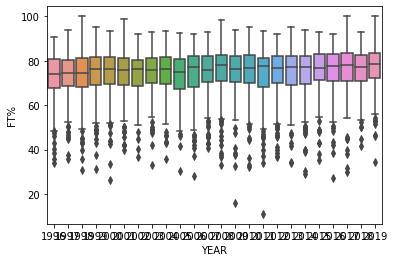

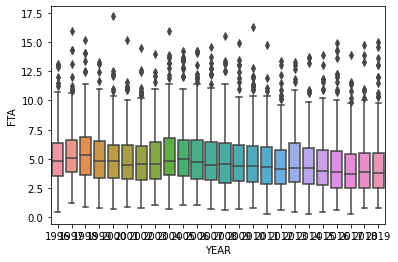

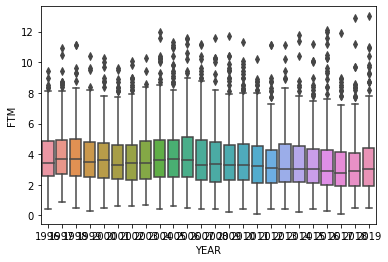

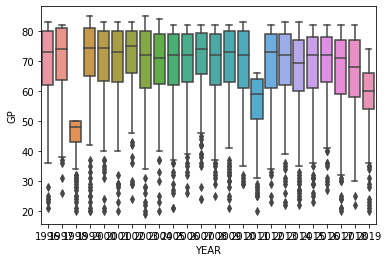

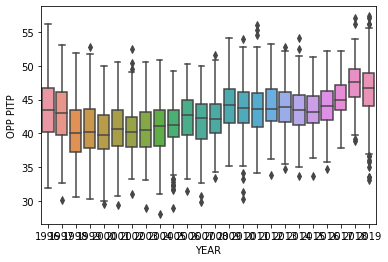

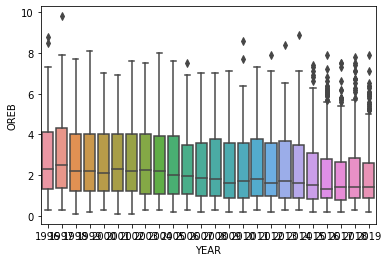

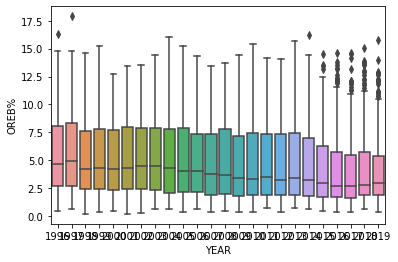

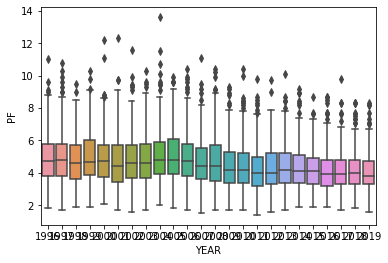

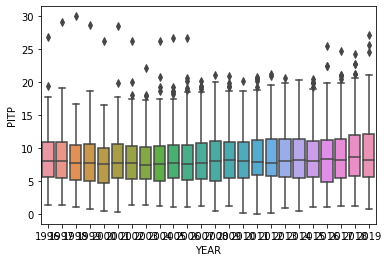

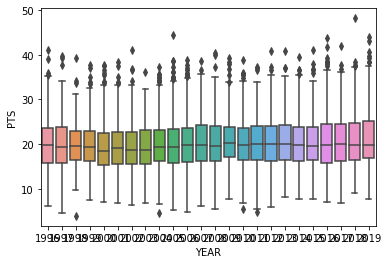

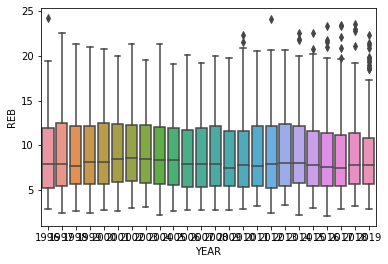

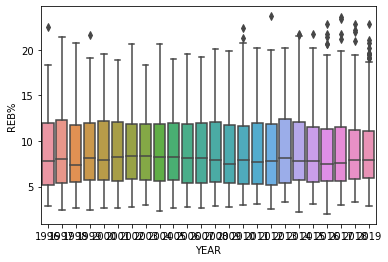

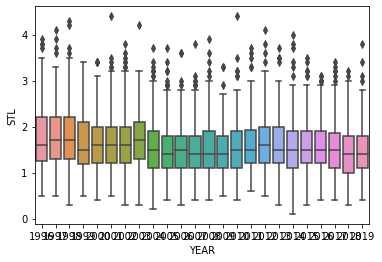

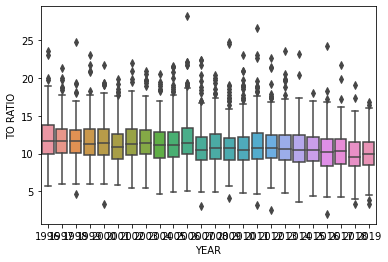

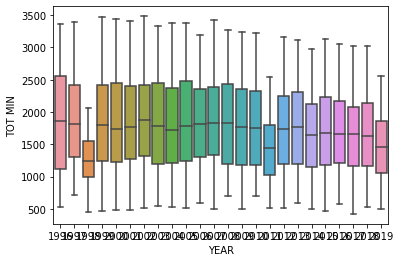

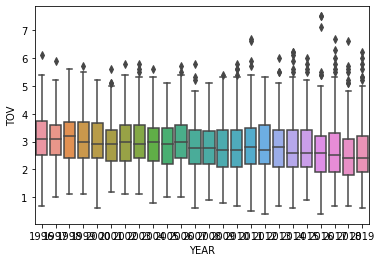

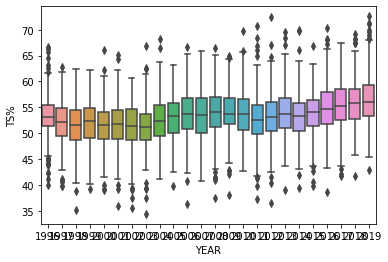

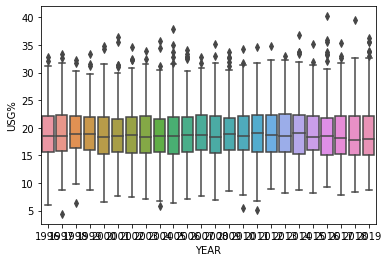

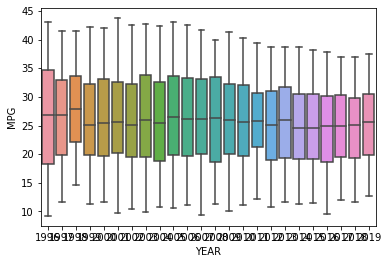

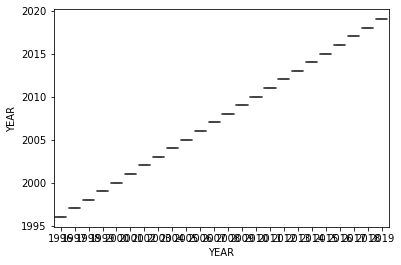

In [55]:
## want to use box plot for each year stat against year to see the distribution of each stat over the years
## i.e. see if there are glaring issues in the data

for col in df.columns:
    sns.boxplot(x="YEAR", y=col, data=df)
    plt.show()

## %PFD is mising data 

In [64]:
## checking again
df.groupby(['YEAR'])['%PFD'].mean()
## yes, must remove

YEAR
1996     0.151220
1997     0.156338
1998     0.122594
1999     2.143750
2000     0.059790
2001     0.112069
2002     0.071528
2003     0.040476
2004     0.042444
2005    19.298658
2006    19.301974
2007    19.182534
2008    19.096732
2009    19.091531
2010    19.128013
2011    19.439865
2012    19.228065
2013    19.289355
2014    19.511677
2015    19.270898
2016    19.197508
2017    19.229358
2018    19.304230
2019    19.291054
Name: %PFD, dtype: float64

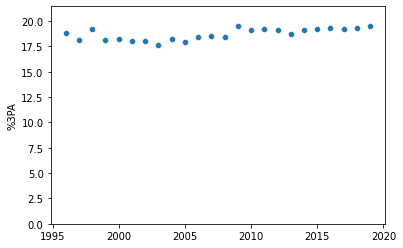

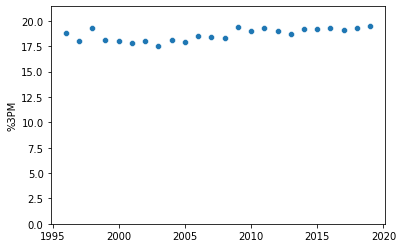

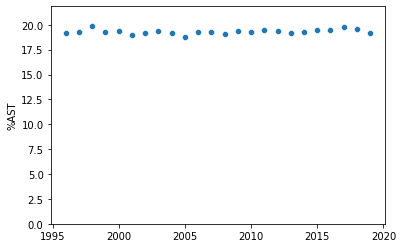

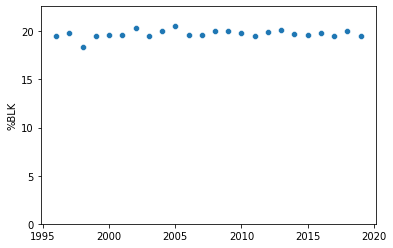

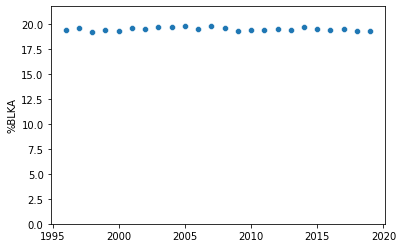

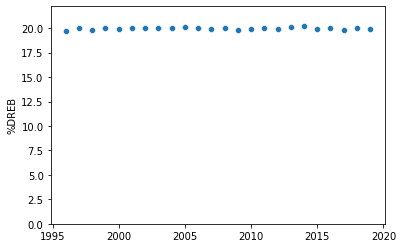

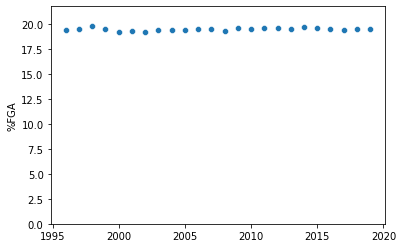

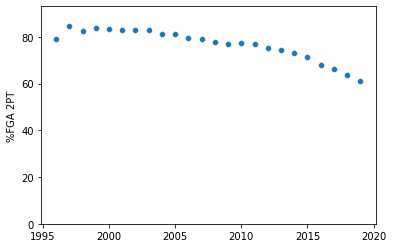

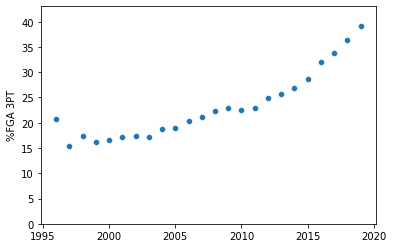

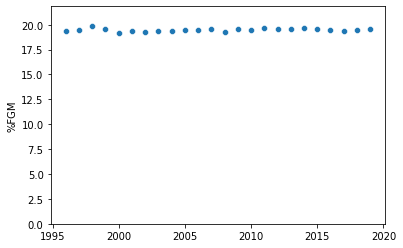

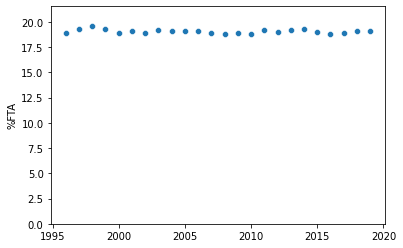

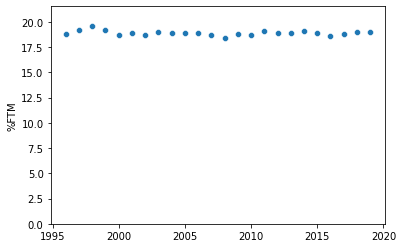

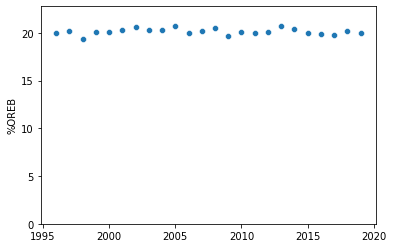

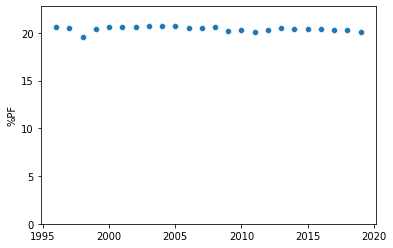

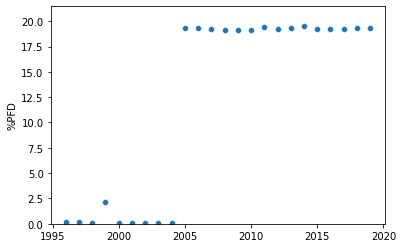

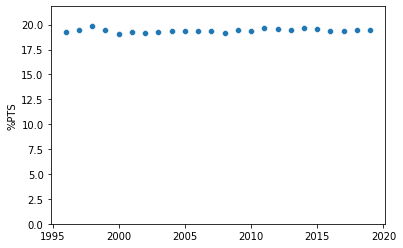

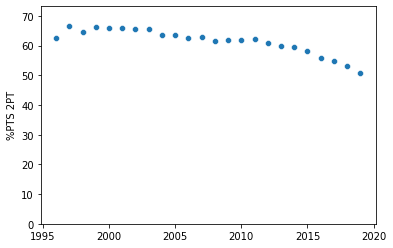

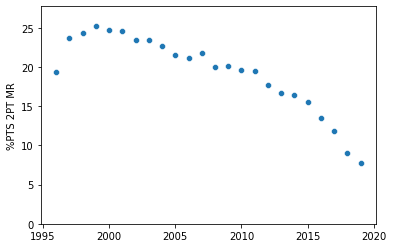

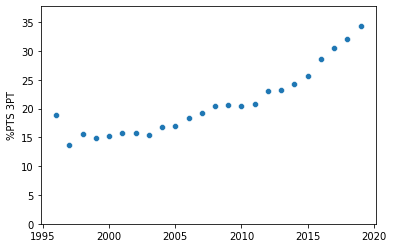

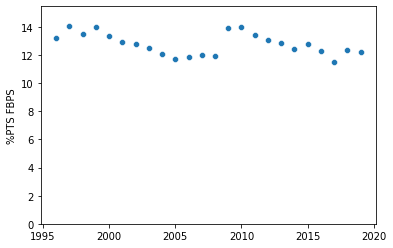

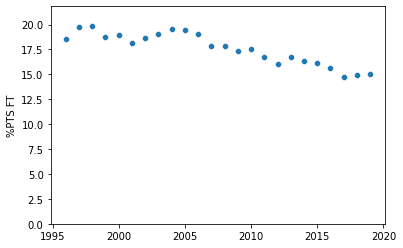

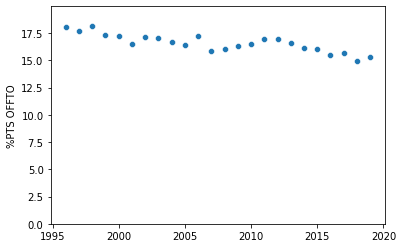

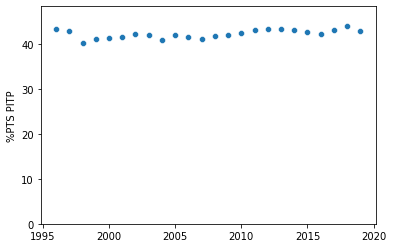

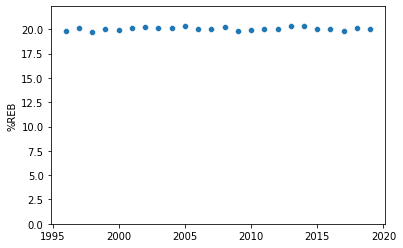

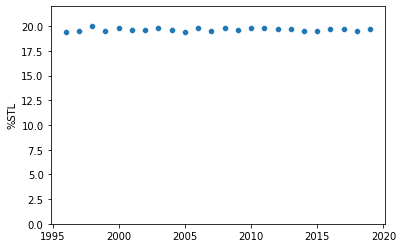

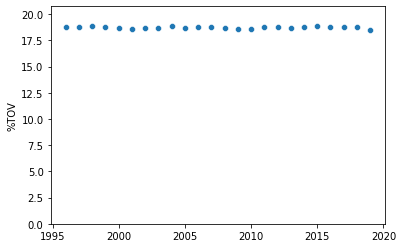

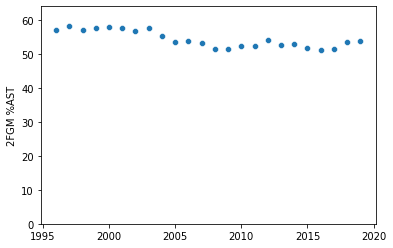

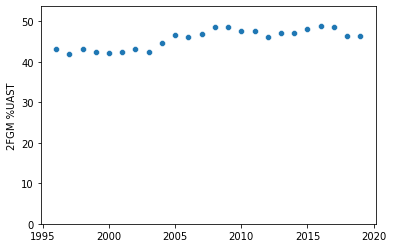

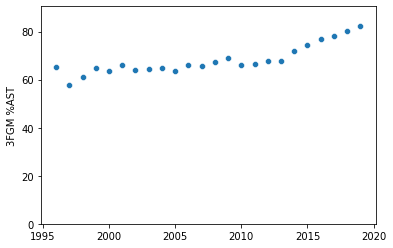

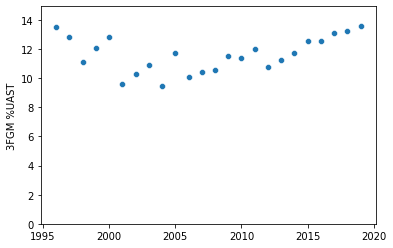

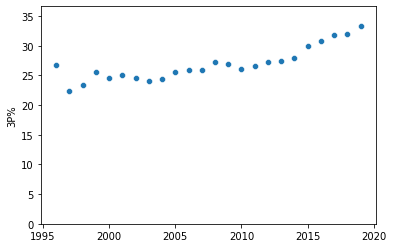

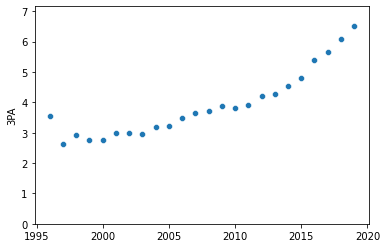

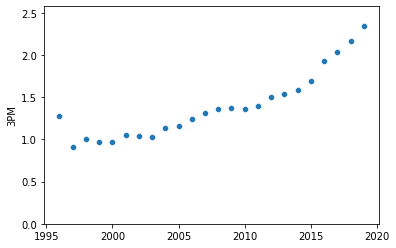

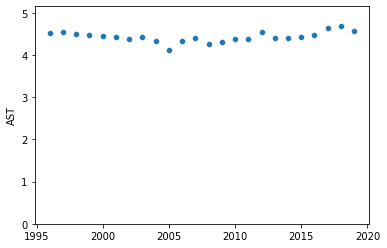

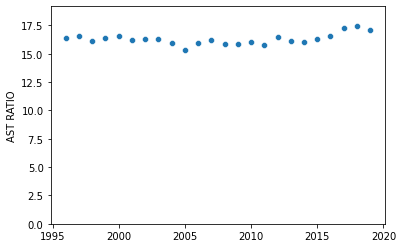

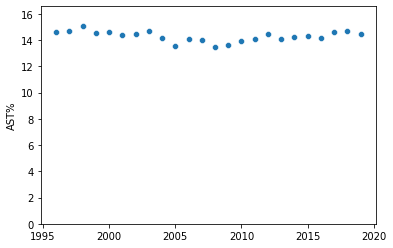

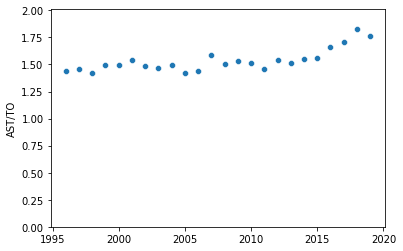

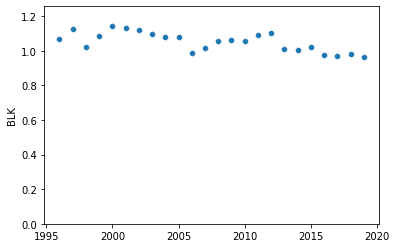

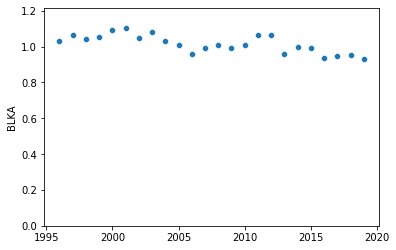

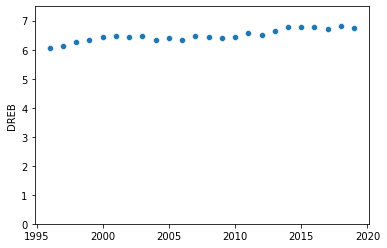

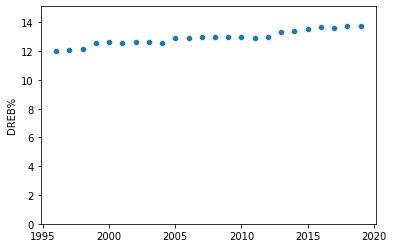

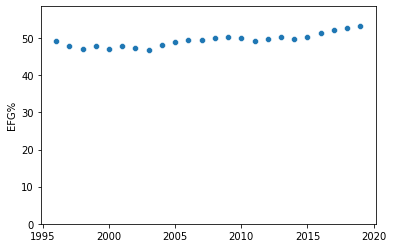

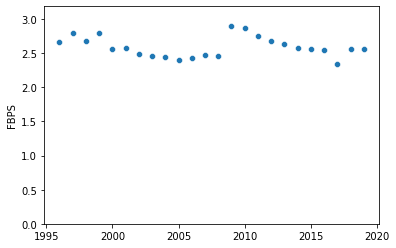

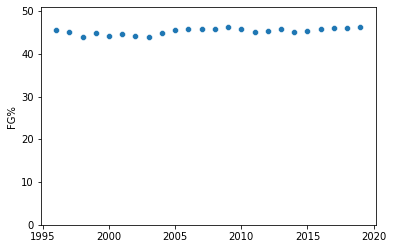

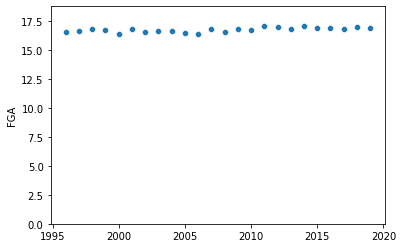

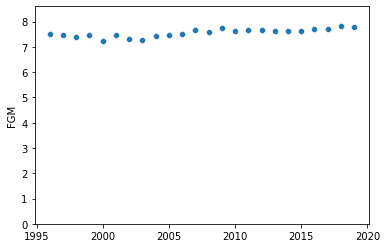

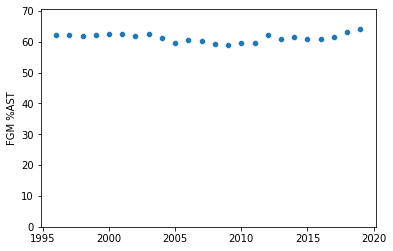

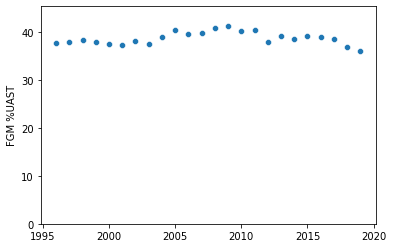

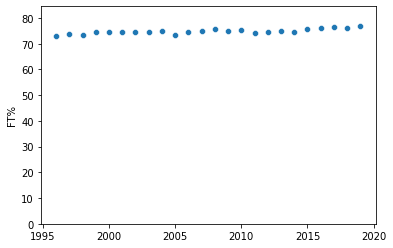

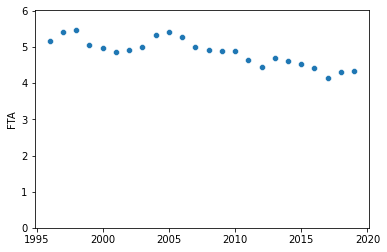

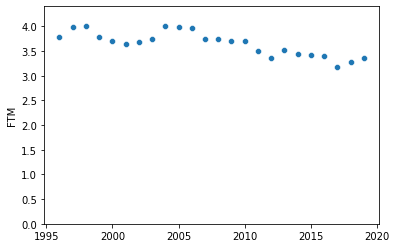

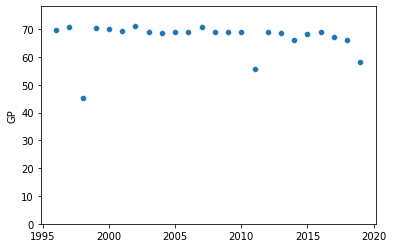

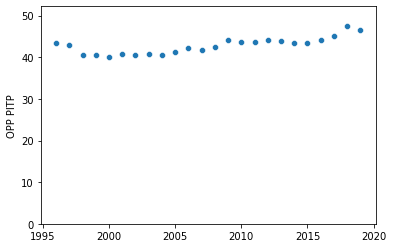

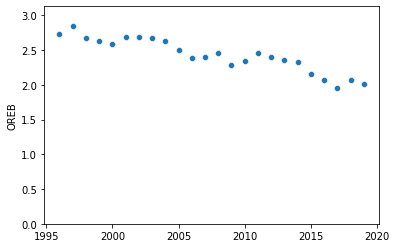

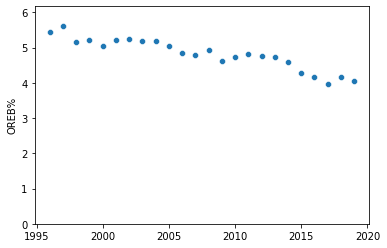

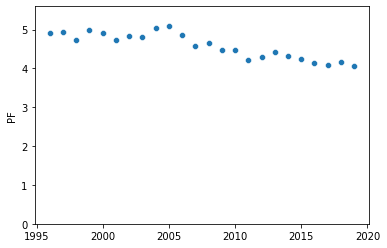

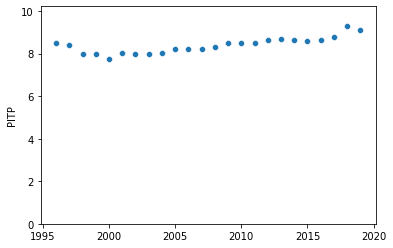

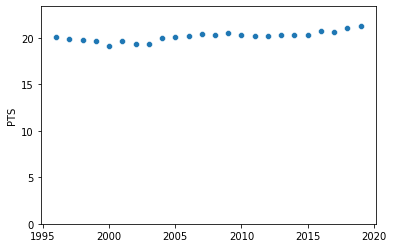

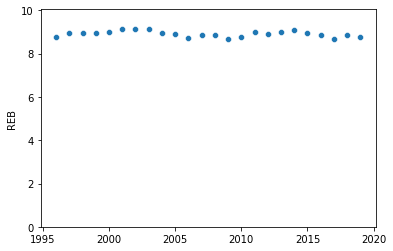

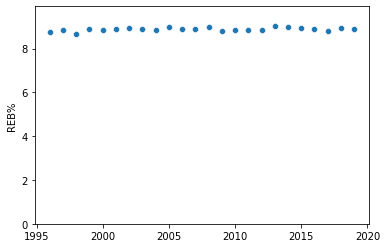

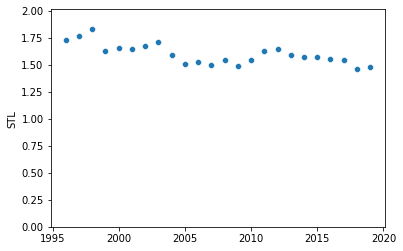

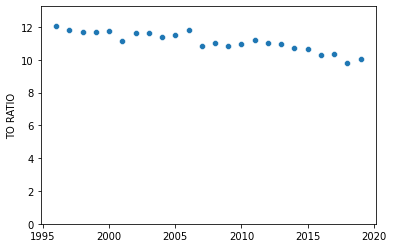

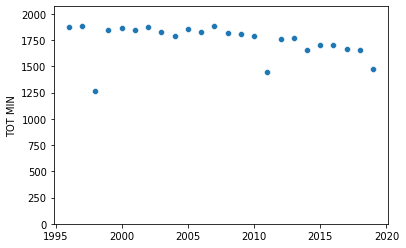

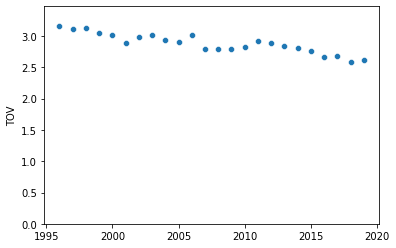

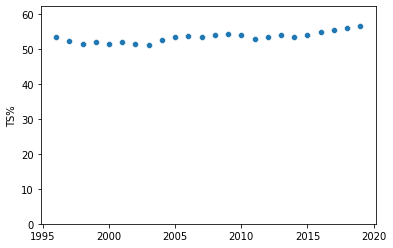

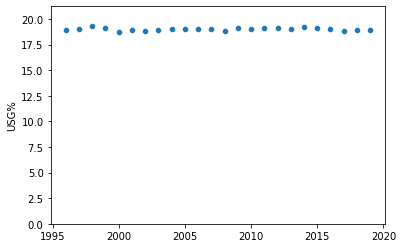

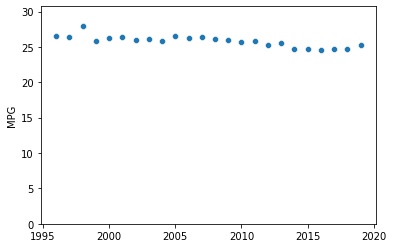

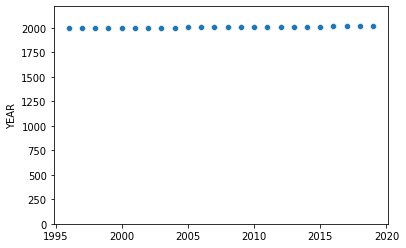

In [85]:
## another quick check on mean only 
years = [yr for yr in range(1996, 2020)]
for col in df.columns:
    
    y = year_grpby[col].mean()
    sns.scatterplot(x=years, y=y)
    plt.ylim(0, y.max() + y.max()/10)
    plt.show()

In [88]:
df_clean = df.drop(['%PFD'], axis=1)
df_clean.shape

(7246, 67)

In [90]:
df_clean.to_csv(data_dir+'clean_data.csv')